#### 회귀 분석

            키       몸무게
키    1.000000  0.919509
몸무게  0.919509  1.000000
0.9195090879163765
0.9195090879163765


<Axes: xlabel='키', ylabel='몸무게'>

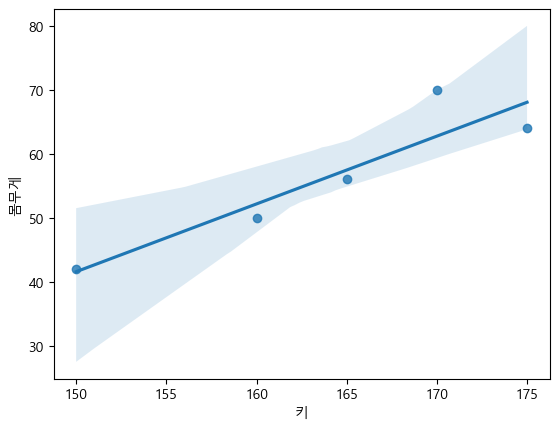

In [37]:
"""
회귀 분석은 수치형 변수 간의 관계 또는 원인과 결과 관계를 예측하는데 사용
상관 계수 - 변수간의 강도와 방향을 측정하는 계수로 두 변수 간의 선형적인 관계가 
어느정도 강한지를 나타냄.

"""
import pandas as pd

data = {
    "키": [150, 160, 170, 175, 165],
    "몸무게": [42, 50, 70, 64, 56]
}
df = pd.DataFrame(data)
df

# 상관 계수 (피어슨) - method="pearson"(생략)
correlation = df.corr()
print(correlation)

print(df["키"].corr(df["몸무게"]))
print(df["몸무게"].corr(df["키"]))

# 그래프 그리기
# 한글글꼴
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family="Malgun Gothic")
# kind - line(선), bar(막대)
# df.plot(kind='scatter', x="키", y="몸무게")

sns.regplot(x="키", y="몸무게", data=df)


#### 선형 회귀 분석(단순선형, 다중 선형)

In [57]:
"""
# 단순 선형 회귀
# 독립변수 1개와 종속 변수 1개로 이루어짐
# 키가 몸무게에 미치는 영향을 분석해서 회귀 모델 구축
# statsmodels.formula.api
# '~' 독립변수 ~ 종속변수 
"""
import pandas as pd

data = {
    '키': [150, 160, 170, 175, 165, 155, 172, 168, 174, 158,
          162, 173, 156, 159, 167, 163, 171, 169, 176, 161],
    '몸무게': [42, 50, 70, 64, 56, 48, 68, 60, 65, 52,
            54, 67, 49, 51, 58, 55, 69, 61, 66, 53]
}
df = pd.DataFrame(data)
df

from statsmodels.formula.api import ols

# formula - "키 ~ 몸무게"
model = ols("키 ~ 몸무게", data=df).fit()
print(model.summary())
# help(ols)
# 결정 계수 - 모델이 그 데이터를 얼마나 잘 설명하느냐를 나타내는 통계값
# 1에 가까울 수록 잘 설명함(R2)
print("결정계수:", model.rsquared)

# 회귀 계수 - y=ax + b(a:기울기, b:y절편), y= 0.86x + 115
print("회귀계수: ", model.params)
print("기울기: ", model.params['몸무게'])
print("절편: ", model.params["Intercept"])
print("p-value: ", model.pvalues["몸무게"]) #지수표기법
print(f"p-value: {model.pvalues["몸무게"]:.10f}") #일반 표기법

# 평가 지표 - mse(평균제곱오차), mae(평균절대값오차), rmse(평균제곱근오차)
# 잔차 = 실제값-예측값
df['잔차'] = df['키'] - model.predict(df)
df
# 잔차 제곱합
print((df['잔차']**2).sum())

# MSE(평균 제곱 오차)
df['잔차'] = df['키'] - model.predict(df)
mse = (df['잔차']**2).mean()
print("MSE:", mse)

# 몸무게가 67일때 키를 예측
new_df = pd.DataFrame({"몸무게": [72]})
result = model.predict(new_df)
print(result)
# print(round(result[0], 1))

                            OLS Regression Results                            
Dep. Variable:                      키   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     148.0
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           4.04e-10
Time:                        17:48:27   Log-Likelihood:                -45.761
No. Observations:                  20   AIC:                             95.52
Df Residuals:                      18   BIC:                             97.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    115.0676      4.158     27.671      0.0

#### 다중 선형 회귀(Multiple Linear Regression)

In [31]:
"""
# 2개 이상이 독립변수와 하나의 종속 변수간의 관계를 분석
# statsmodels.formula.api --> ols(formula, data).fit (모델)
# formula = "종속변수 ~ 독립변수1 + 독립변수2..."
# 예제 - 광고비, 직원수가 매출액에 미치는 영향 
"""

import pandas as pd
data = {
    '매출액': [300, 320, 250, 360, 315, 328, 310, 335, 326, 280,
            290, 300, 315, 328, 310, 335, 300, 400, 500, 600],
    '광고비': [70, 75, 30, 80, 72, 77, 70, 82, 70, 80,
            68, 90, 72, 77, 70, 82, 40, 20, 75, 80],
    '직원수': [15, 16, 14, 20, 19, 17, 16, 19, 15, 20,
            14, 5, 16, 17, 16, 14, 30, 40, 10, 50]
    }
df = pd.DataFrame(data)
# print(df.head(3))

# 회귀 모델 구축
from statsmodels.formula.api import ols

model = ols("매출액 ~ 광고비 + 직원수", data=df).fit()
print(model.summary())

# 결정 계수
print("R2:", model.rsquared)

# 회귀 계수 - 기울기와 절편
print(model.params)
# print("상관계수: ", model.params['광고비'])
# print("상관계수: ", model.params['직원수'])
print("절편(상수항): ", model.params["Intercept"])

# 광고비의 회귀계수가 통계적으로 유의한지 검정
print("p-value:", model.pvalues['광고비'])
print("p-value:", model.pvalues['직원수'])

# MSE(평균제곱오차 - 수치가 작을수록 좋음) - 평가 지수
df['잔차'] = df['매출액'] - model.predict(df)
mse = (df['잔차']**2).mean()
print("MSE:", mse)

# test 자료 -  광고비 50, 직원수 20인 예상 매출액 구하기
new_df = pd.DataFrame({
    "광고비": [50],
    "직원수": [20]
})
pred = model.predict(new_df)
print("예상 매출액:", round(pred[0]))

                            OLS Regression Results                            
Dep. Variable:                    매출액   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     8.907
Date:                Tue, 19 Nov 2024   Prob (F-statistic):            0.00226
Time:                        10:25:29   Log-Likelihood:                -108.22
No. Observations:                  20   AIC:                             222.4
Df Residuals:                      17   BIC:                             225.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    101.0239     71.716      1.409      0.1

#### 로지스틱 회귀 분석(Rogistic Regression)

In [56]:
"""
# 회귀 분석중 종속변수(목표변수)가 범주(object)형인 경우 사용
# 머신러닝 지도학습 방법에서 분류에 해당됨
# statsmodels.formula.api --> logit(formula, data).fit (모델)
# 예제 - 특정 질병의 유무를 나타내는 환자 데이터셋
  - 독립변수 : age, bmi(체질량 지수)
  - 종속변수 : disease
  - bmi(체질량 지수) : 자신의 몸무게를 키의 제곱으로 나눈값(정상, 과체중, 비만) 
"""

"""
# 오즈비(Odds) - 어떤 사건이 발생할 확률과 그 사건이 발생하지 않을 확률의 비율
  - P(A) / 1 - P(A)
  - 오즈비(Odds Ratio) > 1 : 특정 조건 또는 노출이 사건 발생가능성을 증가 시킴
  - 오즈비 = 1 : 특정 조건 또는 노출이 사건 발생가능성에 영향을 미치지 않음
  - 오즈비 < 1 : 특정 조건 또는 노출이 사건 발생가능성을 감소 시킴
"""
import pandas as pd
from statsmodels.formula.api import logit
import numpy as np

df = pd.read_csv("health_survey.csv")
# print(df.head())
# print(df.info())

# 모델 구축
model = logit("disease ~ age + bmi", data=df).fit()
print(model.summary())

# bmi 계수값(가중치)
bmi = model.params['bmi']
print(bmi)

# bmi 값을 지수 함수(np.exp())를 사용해 오즈비로 변환
odds_ratio = np.exp(bmi)
print("오즈비:", odds_ratio)

# 로그(log함수) 우도, 잔차 이탈도(로그우도 -2를 곱합)
# 잔차이탈도 - 모델이 얼마나 데이터를 잘 설명하는지에 대한 척도
print("로그 우도", model.llf)
print("잔차이탈도", -2*model.llf)

Optimization terminated successfully.
         Current function value: 0.643725
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                disease   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Tue, 19 Nov 2024   Pseudo R-squ.:                 0.04996
Time:                        13:18:53   Log-Likelihood:                -643.72
converged:                       True   LL-Null:                       -677.58
Covariance Type:            nonrobust   LLR p-value:                 1.984e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8700      0.289     -6.482      0.000      -2.435      -1.305
age            0.0177      0.